# Step 1: Blob detection

The `lentil.png` image is a greyscale image from constructed from the red light and near infrared light channels of a multispectral camera.  (Thanks to Dr. Kirstin Bett, Dept. of Plant Sciences, College of Agriculture for the image!).  The bright blobs you see in the middle section of the image are clusters of lentil plants called plots (each plot is a different genetic lineage).  These are areas of interest for plant breeders because they want to analyze the patches of plant, while ignoring the background soil.  To do that in an automated algorithm, we first have to find the plots!

Use one of the blob detection functions described at the end of the Topic 5 lecture slides to detect the blobs in the `lentil.png` image.  Obtain the best result you can from any one of the three available functions (in `skimage.feature`), namely `blob_log()`, `blob_dog()`, or `blob_doh()`.  Try the different functions and experiment with their parameters.   Don't worry too much about the correctness of the blobs at the very top and very bottom that are outside the area of the field trial.  These are not areas of interest.

For your best result, draw the blobs as circles on the output image and display the result.    The last slide of Topic 5 gives you an example of some code that does this.  Sample output is shown in the assignment description document.

Sample output is given in the assignment document but be aware that it is not necessarily representative of the quality of the blob detection that you might achieve because I did not spend more than 5 minutes tweaking the parameters.  You should be able to do at least as well, but possibly also better.  

_Hint: as usual, it is suggested that you convert the image to dtype `float` before processing._

_Hint: the lentil field image is pretty big, so you'll need to set the figure size to something larger.  For me `plt.figure(figsize=(20,7))` worked well, but I have an almost 4K display.  Smaller may work for you._




In [4]:
import skimage.io as io
import skimage.util as util
import skimage.feature as feat
import matplotlib.pyplot as plt
import numpy as np

I_l = io.imread("lentil.png")
I_l = util.img_as_float(I_l)

def blob_detector(I, method="log", min_sigma=1, max_sigma=50, num_sigma=10, threshold=0.2):

    if method == "log":
        blobs = feat.blob_log(I, min_sigma=min_sigma, max_sigma=max_sigma, num_sigma=num_sigma, threshold=threshold)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)
    elif method == "dog":
        blobs = feat.blob_dog(I, min_sigma=min_sigma, max_sigma=max_sigma, threshold=threshold)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)
    elif method == "doh":
        blobs = feat.blob_doh(I, min_sigma=min_sigma, max_sigma=max_sigma, threshold=threshold)
        # Don't need to make doh into a radius
    else:
        raise ValueError("method must be 'log', 'dog', or 'doh'")
    return blobs


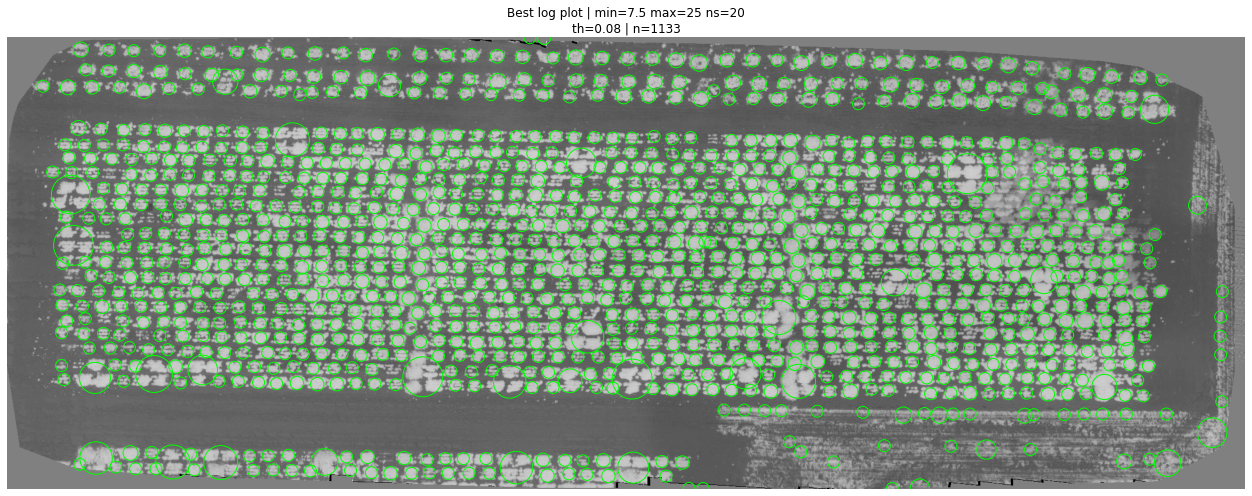

In [ ]:
m = "log"
min_s = 7.5
max_s = 25
ns = 20
th=0.08

fig, axes = plt.subplots(1,1, figsize=(20, 7))

B = blob_detector(I_l, m, min_s, max_s, ns, th)
axes.imshow(I_l, cmap='gray', vmin=0, vmax=1)
for y, x, r in B:
    axes.add_patch(plt.Circle((x, y), r, color='lime', fill=False, linewidth=1.0))
axes.set_axis_off()
axes.set_title(f"Best {m} plot | min={min_s} max={max_s} ns={ns}\nth={th} | n={len(B)}")


plt.tight_layout()
plt.show()

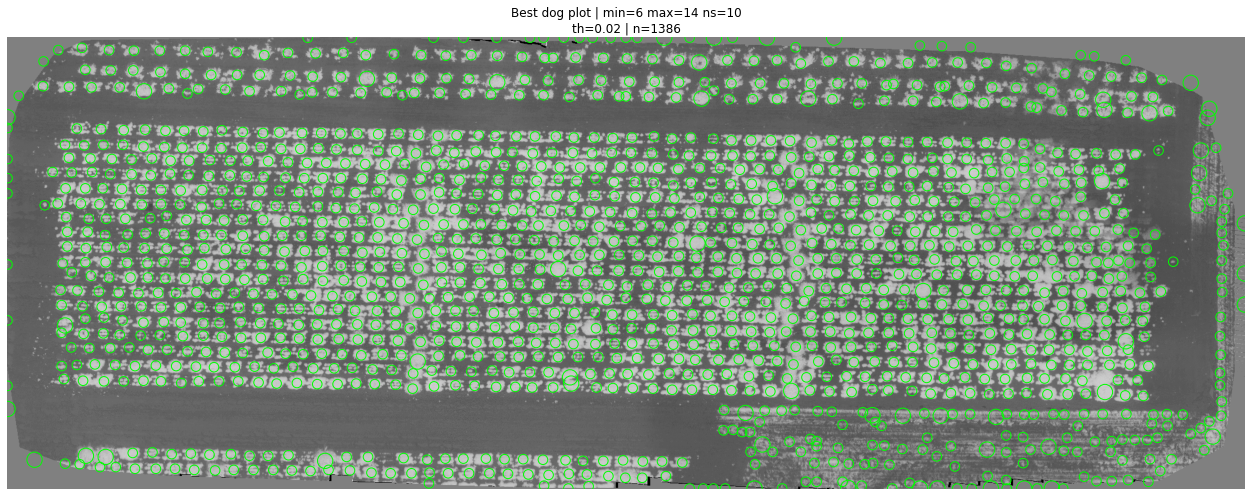

In [35]:
m = "dog"
min_s = 6
max_s = 14
ns = 10
th=0.02

fig, axes = plt.subplots(1,1, figsize=(20, 7))

B = blob_detector(I_l, m, min_s, max_s, ns, th)
axes.imshow(I_l, cmap='gray', vmin=0, vmax=1)
for y, x, r in B:
    axes.add_patch(plt.Circle((x, y), r, color='lime', fill=False, linewidth=1.0))
axes.set_axis_off()
axes.set_title(f"Best {m} plot | min={min_s} max={max_s} ns={ns}\nth={th} | n={len(B)}")


plt.tight_layout()
plt.show()

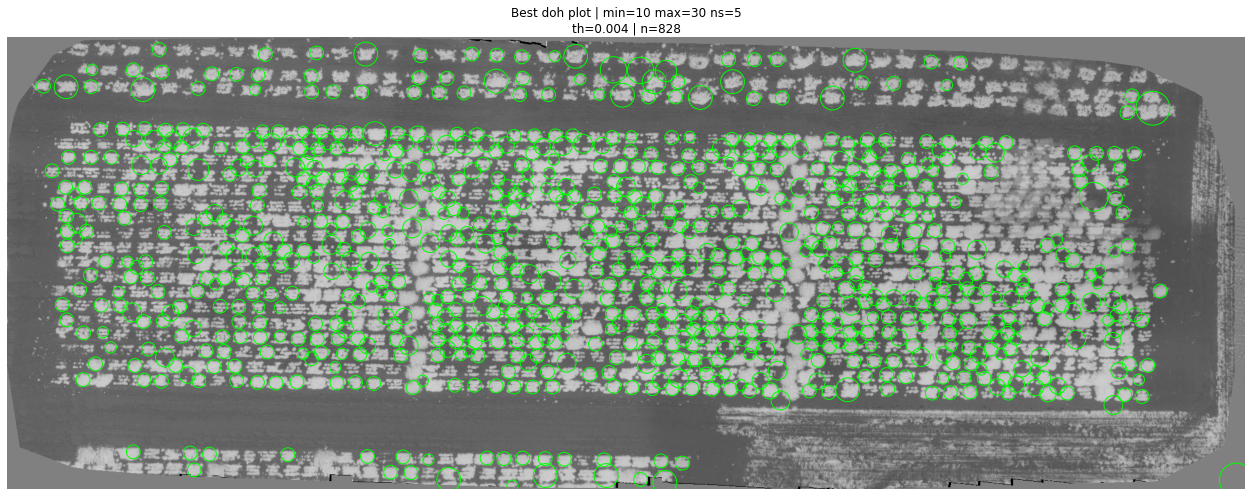

In [41]:
m = "doh"
min_s = 10
max_s = 30
ns = 5
th=0.004

fig, axes = plt.subplots(1,1, figsize=(20, 7))

B = blob_detector(I_l, m, min_s, max_s, ns, th)
axes.imshow(I_l, cmap='gray', vmin=0, vmax=1)
for y, x, r in B:
    axes.add_patch(plt.Circle((x, y), r, color='lime', fill=False, linewidth=1.0))
axes.set_axis_off()
axes.set_title(f"Best {m} plot | min={min_s} max={max_s} ns={ns}\nth={th} | n={len(B)}")


plt.tight_layout()
plt.show()

# Step 2:  Thinking and Analysis

### Answer these questions, right here in this block.

1.  What properties of the image did you consider when selecting parameters for blob detection?  

	* Size of the blobs I wanted to detect, density of the blobs, and what to consider a single blob instead of two different blobs (ie the top left considered point could technically be a bunch of very tiny blobs but its really just one bigger blob)

2.  What kinds of errors (in terms of detecting the plots) did you observe in the detected blobs?  

	* Detecting blobs where none were present (noise sensetivity) detecting one blob where many were present (max_sigma too high), not detecting blobs when they were present (threshold or min_sigma too high)

3.  How might you mitigate those errors in one or more post-processing steps?

	* I'm considering the results of the DoG method to be the best, and talking about making those results better. If was planning to use post processing on the results I think I would decrease my maximum sigma to lower the amount of larger blobs I'm getting that overlap or touch smaller blobs, then implement a region growth algorithm using the center of each blob as the starting point to extend each blob using greys above a certain threshold. From this I would threshold the regions that were grown to create a mask of the image that only contains position data of the various plots. Then I would use a region processing algrothim to colour label each of the plots of land, and place the colour mask on top of the greyscale image to make the various regions more obvious.

